# 安徽安庆市项目`WRF-CMAQ`模拟分析
## Model Evaluation : `chem-obs data`

---
*@author: Evan*\
*@date: 2023-05-17*

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import shapely.geometry as sgeom
from shapely.prepared import prep
import matplotlib.pyplot as plt

import sys
sys.path.append('../src/')
import ModelEvaLib as me

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['Times New Roman'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
def polygon_to_mask(polygon, x, y):
    '''
    Generate a mask array of points falling into the polygon
    '''
    x = np.atleast_1d(x)
    y = np.atleast_1d(y)
    mask = np.zeros(x.shape, dtype=bool)

    # if each point falls into a polygon, without boundaries
    prepared = prep(polygon)
    for index in np.ndindex(x.shape):
        point = sgeom.Point(x[index], y[index])
        if prepared.contains(point):
            mask[index] = True

    return mask

In [22]:
chem = xr.open_dataset('F:/Data/Project_anqing/April/add_data/April_05wind_chem.nc')
O3 = chem.O3[:,0,:,:]

start = pd.Timestamp('2023-04-06')
end   = pd.Timestamp('2023-04-10T23')

chemold = xr.open_dataset('F:/Data/Project_anqing/April/April_chem.nc')
O3old = chemold.O3[:,0,:,:].sel(time=slice(start,end))

## 安庆市全部

In [24]:
shpfile = 'F:/Data/Project_anqing/shapefile/Anqing/Anqing.shp'
shpurban = 'F:/Data/Project_anqing/shapefile/Anqing_urban/urban.shp'
shp = gpd.read_file(shpfile)
for i in range(np.size(chem.latitude,0)):
    for j in range(np.size(chem.latitude,1)):
        if me.polygon_to_mask(shp.geometry[0],chem.longitude[i,j],chem.latitude[i,j])==False:
            O3[:,i,j] = np.nan
            O3old[:,i,j] = np.nan
            
sim = np.nanmean(np.nanmean(O3,1),1)
simold = np.nanmean(np.nanmean(O3old,1),1)
sim.shape

(120,)

In [6]:
xlsfile = pd.read_excel('F:/Data/Project_anqing/April/obsdata/allsite.xlsx',index_col=0)
obs = xlsfile['O3']['2023-04-06':'2023-04-10']
obs.shape

(120,)

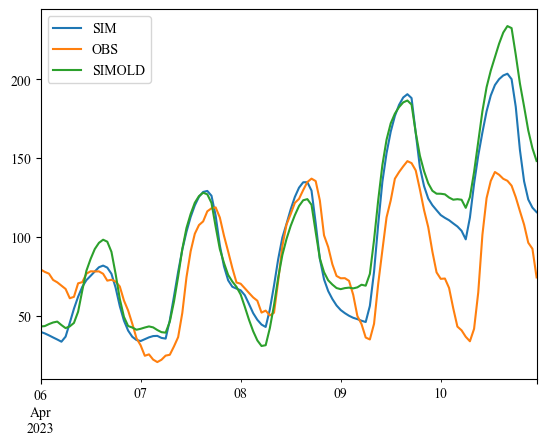

In [25]:
df = pd.DataFrame(
    index=pd.date_range('2023-04-06T00','2023-04-10T23',freq='H'),
    data={
        'SIM':sim,
        'OBS':obs.values,
        'SIMOLD':simold,
    }
    )
df.plot()
plt.show()

In [5]:
me.evaluation_frame(obs, sim, df)

,param,value
0,obs mean,76.873522
1,sim mean,112.950119
2,R,0.551913
3,MB,36.076597
4,RMSE,55.660326
5,IOA,0.623586


## 安庆市城区

In [26]:
chem = xr.open_dataset('F:/Data/Project_anqing/April/add_data/April_05wind_chem.nc')
O3 = chem.O3[:,0,:,:]

start = pd.Timestamp('2023-04-06')
end   = pd.Timestamp('2023-04-10T23')

chemold = xr.open_dataset('F:/Data/Project_anqing/April/April_chem.nc')
O3old = chemold.O3[:,0,:,:].sel(time=slice(start,end))

In [27]:
shpfile = 'F:/Data/Project_anqing/shapefile/Anqing/Anqing.shp'
shpurban = 'F:/Data/Project_anqing/shapefile/Anqing_urban/urban.shp'
shp = gpd.read_file(shpurban)
for i in range(np.size(chem.latitude,0)):
    for j in range(np.size(chem.latitude,1)):
        if me.polygon_to_mask(shp.geometry[0],chem.longitude[i,j],chem.latitude[i,j])==False:
            O3[:,i,j] = np.nan
            O3old[:,i,j] = np.nan
            
sim = np.nanmean(np.nanmean(O3,1),1)
simold = np.nanmean(np.nanmean(O3old,1),1)
sim.shape

(120,)

In [28]:
xlsfile = pd.read_excel('F:/Data/Project_anqing/April/obsdata/urban.xlsx',index_col=0)
obs = xlsfile['O3']['2023-04-06':'2023-04-10']
obs.shape

(120,)

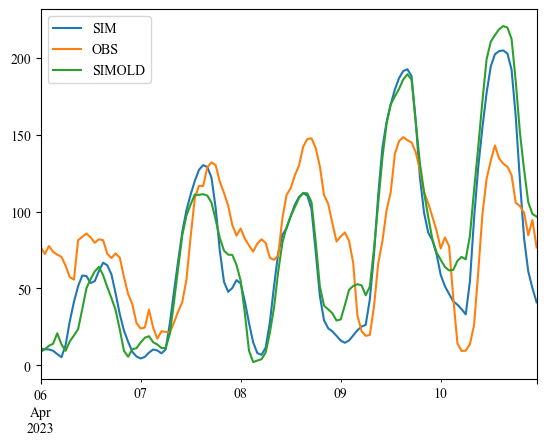

In [29]:
df = pd.DataFrame(
    index=pd.date_range('2023-04-06T00','2023-04-10T23',freq='H'),
    data={
        'SIM':sim,
        'OBS':obs.values,
        'SIMOLD':simold,
    }
    )
df.plot()
plt.show()